# 1. Analysis of A24 Movies data from Rotten Tomatoes
- correlation between audience and critic ratings?
- any changes in runtime, scores, etc over the years? 
- best directors? best actors?

# 2. Simple models to predict scores 
- linear model

# Explore the data + Cleaning 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
movies_df = pd.read_csv('full_scraped_a24_df.csv', index_col=0)

In [4]:
## basic exploration
print(f'Size of dataset: {movies_df.shape}')

movies_df.describe()

Size of dataset: (136, 23)


,Release Year
count,136.000000
mean,2017.955882
std,3.236064
min,2012.000000
25%,2015.000000
50%,2017.000000
75%,2021.000000
max,2024.000000


Cleaning required -- there should be more numeric columns than this

In [8]:
print(movies_df.columns)
pd.set_option('display.max_columns', 500)
(movies_df.head())

Index(['Title', 'Release Year', 'RT_score', 'URL', 'Director', 'Cast',
       'Director.1', 'Producer', 'Screenwriter', 'Distributor',
       'Production Co', 'Rating', 'Genre', 'Original Language',
       'Release Date (Theaters)', 'Release Date (Streaming)',
       'Box Office (Gross USA)', 'Runtime', 'Sound Mix', 'Aspect Ratio',
       'audience_score', 'number_audience_reviews',
       'Rerelease Date (Theaters)'],
      dtype='object')


,Title,Release Year,RT_score,URL,Director,Cast,Director.1,Producer,Screenwriter,Distributor,Production Co,Rating,Genre,Original Language,Release Date (Theaters),Release Date (Streaming),Box Office (Gross USA),Runtime,Sound Mix,Aspect Ratio,audience_score,number_audience_reviews,Rerelease Date (Theaters)
0,Lady Bird,2017,99%,https://www.rottentomatoes.com/m/lady_bird,Greta Gerwig,"Saoirse Ronan,Laurie Metcalf,Timothée Chalamet...",Greta Gerwig,"Scott Rudin,Eli Bush,Evelyn O'Neill",Greta Gerwig,A24,"Scott Rudin Productions,A24",R (Language|Brief Graphic Nudity|Sexual Conten...,"Comedy,Drama",English,"Nov 22, 2017, Wide","Feb 13, 2018",$48.9M,1h 34m,Dolby Digital,Flat (1.85:1),79%,"10,000+ Ratings",NaN
1,Eighth Grade,2018,99%,https://www.rottentomatoes.com/m/eighth_grade,Bo Burnham,"Elsie Fisher,Daniel Zolghadri,Fred Hechinger,I...",Bo Burnham,"Scott Rudin,Eli Bush,Lila Yacoub,Christopher S...",Bo Burnham,A24,A24,R (Some Sexual Material|Language),"Comedy,Drama",English,"Aug 3, 2018, Wide","Sep 25, 2018",$13.5M,1h 33m,NaN,Flat (1.85:1),82%,"5,000+ Ratings",NaN
2,Moonlight,2016,98%,https://www.rottentomatoes.com/m/moonlight_2016,Barry Jenkins,"Mahershala Ali,Alex R. Hibbert,Ashton Sanders,...",Barry Jenkins,"Adele Romanski,Dede Gardner,Jeremy Kleiner",Barry Jenkins,A24,"Plan B Entertainment,Upload Films,Pastel",R (Drug Use|Brief Violence|Language Throughout...,"Drama,LGBTQ+",English,"Nov 18, 2016, Wide","Feb 21, 2017",$27.9M,1h 51m,Dolby Digital,Scope (2.35:1),79%,"25,000+ Ratings",NaN
3,Minari,2020,98%,https://www.rottentomatoes.com/m/minari,Lee Isaac Chung,"Steven Yeun,Han Ye-ri,Youn Yuh-jung,Will Patton",Lee Isaac Chung,"Dede Gardner,Jeremy Kleiner,Christina Oh",Lee Isaac Chung,A24,Plan B Entertainment,PG-13 (Some Thematic Elements|A Rude Gesture),Drama,English,"Feb 12, 2021, Limited","Feb 26, 2021",$700.0K,1h 55m,NaN,NaN,87%,"1,000+ Ratings",NaN
4,Marcel the Shell with Shoes On,2021,98%,https://www.rottentomatoes.com/m/marcel_the_sh...,Dean Fleischer-Camp,"Jenny Slate,Rosa Salazar,Thomas Mann,Isabella ...",Dean Fleischer-Camp,"Dean Fleischer-Camp,Andrew Goldman,Elisabeth H...","Dean Fleischer-Camp,Jenny Slate,Nick Paley",A24,Cinereach,PG (Thematic Elements|Some Suggestive Material),"Kids & Family,Comedy,Animation",English,"Jul 22, 2022, Wide","Sep 6, 2022",$5.7M,1h 29m,NaN,NaN,90%,"1,000+ Ratings",NaN


# Genres 

In [45]:
## Explore genres
from collections import Counter 
movies_df['Genre'].value_counts()


all_genres = ','.join(movies_df['Genre']).split(',')
genre_counter = (Counter(all_genres))

print(f'Number of genres : {len(genre_counter)}')
genre_counter

## Sort out the counter to get arranged by frequency of genres
sorted(genre_counter.items(), key= lambda item: -item[1])

Number of genres : 22


[('Drama', 90),
 ('Mystery & Thriller', 46),
 ('Comedy', 45),
 ('Horror', 24),
 ('Romance', 15),
 ('Sci-Fi', 10),
 ('Crime', 9),
 ('Action', 7),
 ('Fantasy', 7),
 ('LGBTQ+', 5),
 ('Adventure', 5),
 ('Biography', 4),
 ('Music', 4),
 ('Western', 4),
 ('History', 4),
 ('War', 4),
 ('Documentary', 3),
 ('Holiday', 2),
 ('Kids & Family', 1),
 ('Animation', 1),
 ('Sports', 1),
 ('Musical', 1)]

In [55]:
genre_freq = pd.DataFrame(genre_counter.items(), columns=['Genre', 'Frequency']).sort_values('Frequency', ascending=False)
genre_freq['Cumulative Sum'] = genre_freq['Frequency'].cumsum()
genre_freq['Cumulative Sum Percentage'] = ((genre_freq['Cumulative Sum']/genre_freq['Frequency'].sum()) * 100).round(2)
genre_freq.reset_index(drop = True)

,Genre,Frequency,Cumulative Sum,Cumulative Sum Percentage
0,Drama,90,90,30.82
1,Mystery & Thriller,46,136,46.58
2,Comedy,45,181,61.99
3,Horror,24,205,70.21
4,Romance,15,220,75.34
5,Sci-Fi,10,230,78.77
6,Crime,9,239,81.85
7,Action,7,246,84.25
8,Fantasy,7,253,86.64
9,LGBTQ+,5,258,88.36


We can see that the big 4 genres by A24 are 
* Drama : 30% of all genres
* Mystery and thriller : a personal favourite 
* Comedy : another personal favourite 
* Horror : what brought me to A24

These 4 genres made up 75% of all genres by A24.

## Genre correlation

In [64]:
print(f"Percentage of movies with more than 1 genre: {movies_df['Genre'].str.contains(',').sum()/len(movies_df)*100} %")

Percentage of movies with more than 1 genre: 75.0 %


As we can see most of the movies contain more than one genre. Let us see which are some popular combinations of genres

To do so we will need to split up the genres into a column for each possible genre, i.e. **one hot encoding**.

In [66]:
unique_genres = genre_freq['Genre'].tolist()

for genre in unique_genres:
    movies_df[genre] = movies_df['Genre'].apply(lambda x: 1 if genre in x else 0)

## Check results 
movies_df[unique_genres].sum(axis=1)

0      2
1      2
2      2
3      1
4      3
      ..
131    1
132    1
133    2
134    3
135    2
Length: 136, dtype: int64

## Cleaning steps 
* Convert numeric categories to numeric 
* Clean dates: Release Dates 
* Clean ratings (separate out the ratings from the reasons for the ratings)

In [23]:
cleaned_df = movies_df.copy()

## Clean scores 
cleaned_df['audience_score'] = cleaned_df['audience_score'].str.replace('%', '')
cleaned_df['RT_score'] = cleaned_df['RT_score'].str.replace('%', '')
## Drop extra director column 
cleaned_df = cleaned_df.drop(columns='Director.1')

In [ ]:
## numeric columns 
numeric_cols = ['Release Year', 'RT_score', ]

### Missing data analysis

In [10]:
## Percentage missing 
movies_df.isna().sum(axis = 0).sort_values(ascending=
                                           False)/movies_df.shape[0]

Rerelease Date (Theaters)    0.955882
Sound Mix                    0.705882
Aspect Ratio                 0.602941
Box Office (Gross USA)       0.213235
Release Date (Streaming)     0.051471
Production Co                0.044118
Distributor                  0.029412
Release Date (Theaters)      0.029412
Screenwriter                 0.022059
Rating                       0.014706
Producer                     0.014706
Release Year                 0.000000
Genre                        0.000000
Original Language            0.000000
Director.1                   0.000000
Cast                         0.000000
Director                     0.000000
Runtime                      0.000000
URL                          0.000000
RT_score                     0.000000
audience_score               0.000000
number_audience_reviews      0.000000
Title                        0.000000
dtype: float64

#### Visualise the missing data 

In [11]:
import missingno as msno

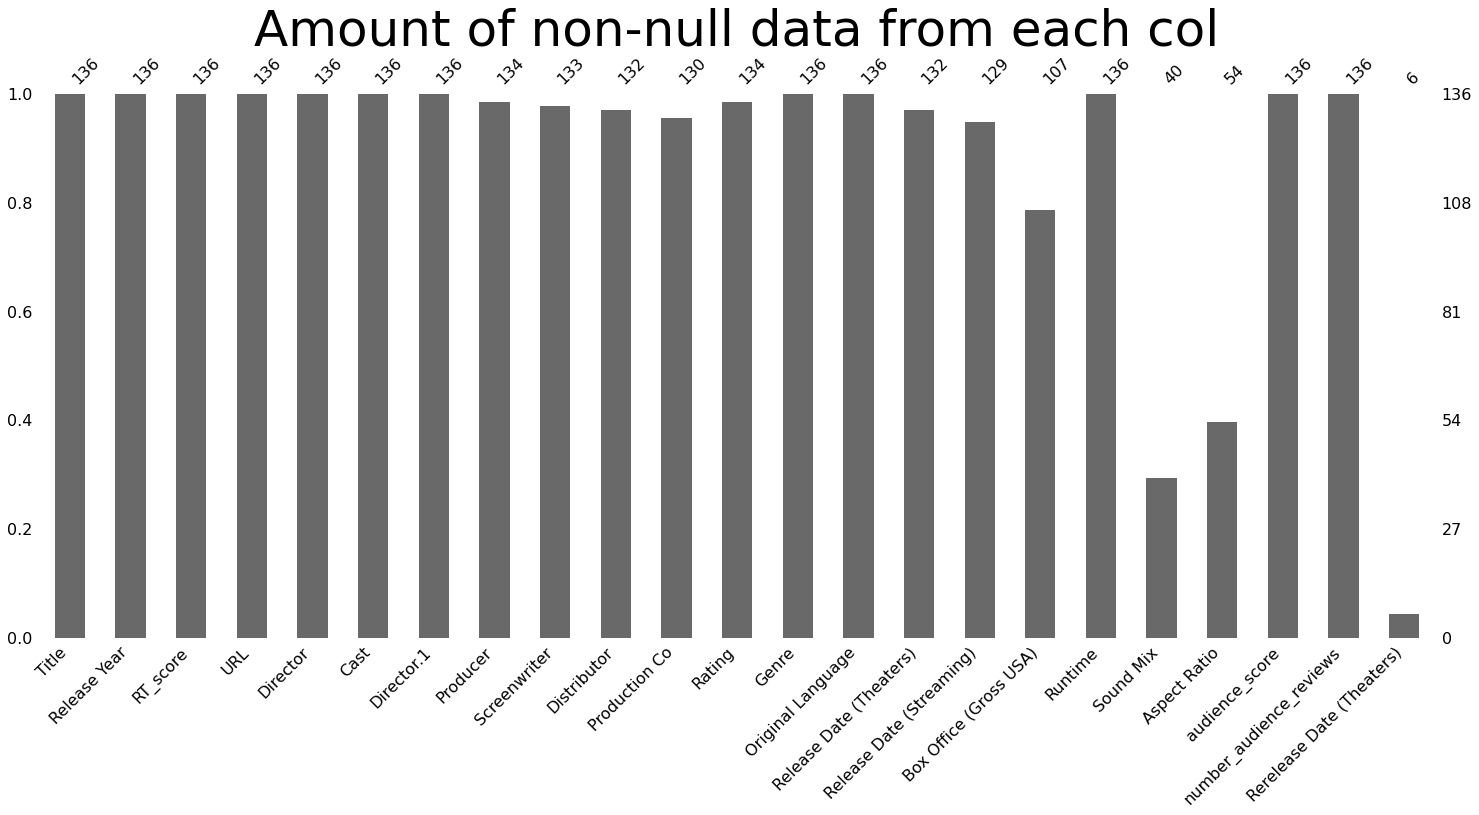

In [12]:
## visualising nullity bu column
msno.bar(movies_df)
plt.title('Amount of non-null data from each col', size = 50)
plt.show()

##### Do the missing data come from the same places - are they correlated?

This could reveal insights into the way we collected the data, i.e. via simple html webscrapping. It is possible that the pages where most data weren't captured had different html structure for the data that we were trying to get, hence causing correlated nullity. 

<AxesSubplot:>

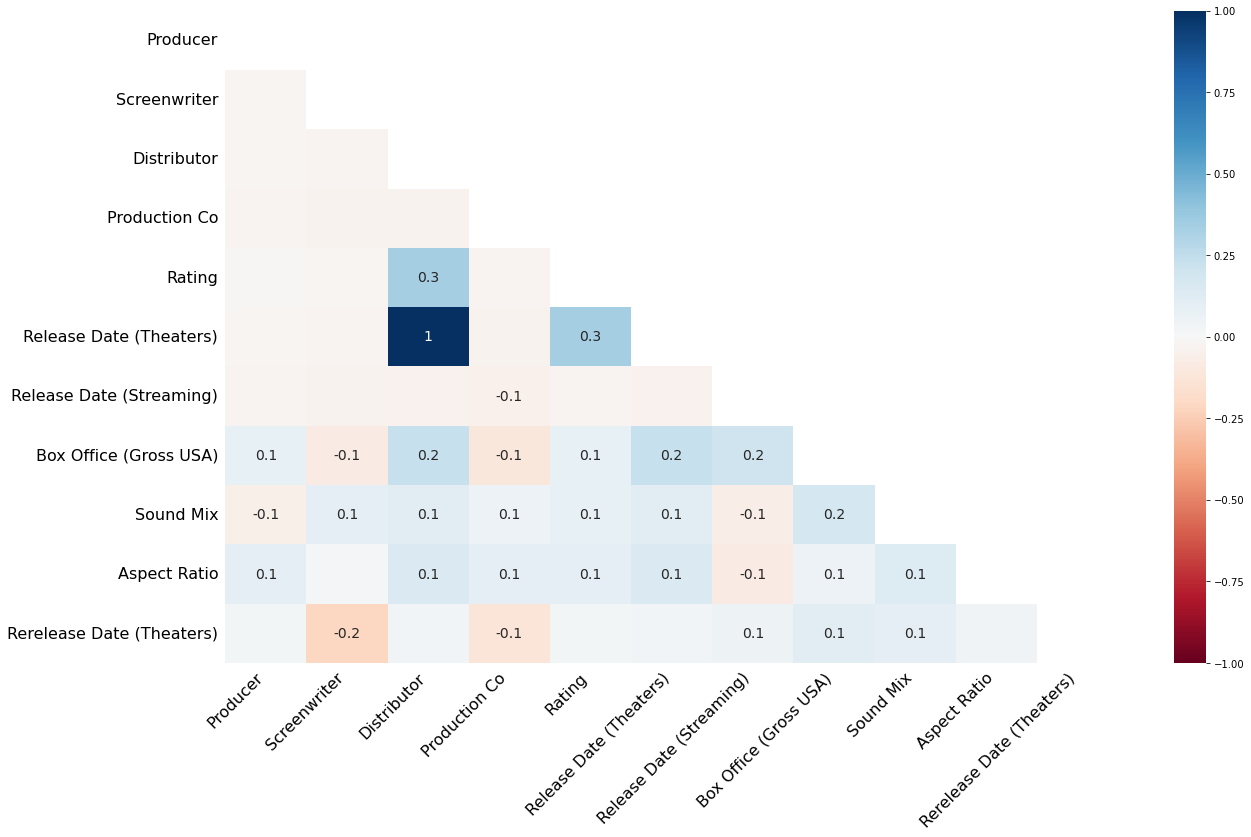

In [13]:
msno.heatmap(movies_df)

The missingness in the missing cols are quite highly correlated. For example, Genre and Duration are perfectly correlated, suggesting that they go missing together. 

# Correlation between audience and critics score?

In [20]:
cleaned_df = movies_df.copy()
cleaned_df['audience_score'] = cleaned_df['audience_score'].str.replace('%', '')
cleaned_df['RT_score'] = cleaned_df['RT_score'].str.replace('%', '')